# Scikit Learn

In [1]:
#Importando Matplotlib e Numpy
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np
%matplotlib inline

In [2]:
mat.__version__

'3.5.1'

In [3]:
np.__version__

'1.21.3'

## Vamos supor que você registrou o tamanho e preço de pizzas que você comeu nos últimos meses com sua familia
intância Diâmetro(cm) Preço(R$)
    1        7           8
    2        10          11
    3        15          16
    4        30          38.5
    5        45          52
   

In [4]:
#Diâmetro (cm)
diametros = [[7], [10], [15], [30], [45]]

#Preços
precos = [[8], [11], [16], [38.5], [52]]

## Vamos visualizar estes dados construindo um plot

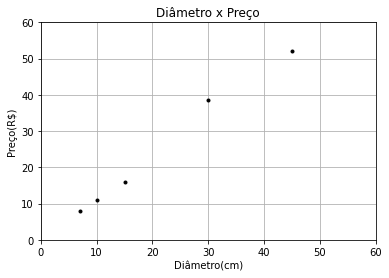

In [5]:
plt.figure()
plt.xlabel('Diâmetro(cm)')
plt.ylabel('Preço(R$)')
plt.title('Diâmetro x Preço')
plt.plot(diametros, precos, 'k.')
plt.axis([0, 60, 0, 60])
plt.grid(True)
plt.show()

### Pelo gráfico podemos ver que existe uma relação positiva entre diâmetro da pizza e seu preço (o que é confirmado pela experiência de comer a pizza com sua familia). Á media que o diâmetro da pizza aumenta, geralmente aumenta também o preço da pizza.

### Vamos agora modelar o relacionamento usando regressão linear e criar um modelo para prever o preço da Pizza.

### A classe sklearn.linear_model.LinearRegression é um estimador. Um estimador prevê um valor baseado em dados observadfos. Em sickit-learn, todos os estimadores implementam os métodos fit() e predict(). O método fit() é usado para aprender os parâmetros de um modelo e o método predict() é usado para prever o valor de um váriavel dependente em relação a uma explanatória usando os parâmetros aprendidos.

In [6]:
import sklearn
sklearn.__version__

'0.24.1'

In [7]:
#Importando o módulo de Regressão Linear do scikit-learn
from sklearn.linear_model import LinearRegression

In [8]:
#Preparando os dados de treino

#Vamos chamar de X os dados de diâmetreo da Pizza;
x = [[7], [10], [15], [30], [45]]

#Vamos chamar de Y os dados de preço da Pizza
y = [[8], [11], [16], [38.5], [52]]

In [9]:
#Criando o modelo
modelo = LinearRegression()

In [10]:
type(modelo)

sklearn.linear_model._base.LinearRegression

In [11]:
#Treinando modelo
modelo.fit(x, y)

LinearRegression()

In [12]:
#Prevendo o preço de uma pizza de 20 cm de diâmetro

#Não usamos mais esta sintaxe:
#print("Uma pizza de 20 cm de diâmetro deve custar: R$%.2f" % modelo.predict([20][0]))

#Usamos agora esta sintaxe:
print("Uma pizza de 25 cm de diâmetro deve custar: R$%.2f" % modelo.predict([[25]]))

Uma pizza de 25 cm de diâmetro deve custar: R$29.44


### Construindo um Scatter Plot

In [13]:
#Coeficiente
print('Coeficiente \n', modelo.coef_)

#MSE (mean square error)
print("MSE: %.2f" % np.mean((modelo.predict(x) - y) ** 2))

#Score de variação: 1 representa predição perfeita
print('Score de veriação: %2.f' % modelo.score(x, y))

Coeficiente 
 [[1.20422117]]
MSE: 2.74
Score de veriação:  1


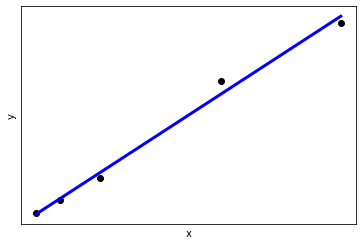

In [15]:
#Scatter Plot representação e regressão linear
plt.scatter(x, y, color = 'black')
plt.plot(x, modelo.predict(x), color = 'blue', linewidth = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(())
plt.yticks(())

plt.show()

### Explorando o Dataset Boston Housing

In [17]:
#Importando os módulos necessários
import numpy as np
import pandas as pd
import scipy.stats as state
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [18]:
#O dataset boston já está disponível no scikit-learn. Precisamos apenas crregá-lo
from sklearn.datasets import load_boston
boston = load_boston()

In [19]:
#Verificando o tipo da variavel Boston
boston.data.shape

(506, 13)

In [20]:
#Descrição do Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [22]:
#Corvertendo o dataset em um DataFrame pandas
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
#Convertendo o título das colunas
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
#boston.target é um array com o preço das casas
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [26]:
#Adicionando o preço de casa ao DataFrame
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Prevendo o Preço das Casas em Boston

#### Y - variável dependente (preço das casas em Boston)
#### X - variável independentes ou explanatórias (todas as outras caracteristicas da casa)

In [27]:
#Importando o módulo de regressão linear
from sklearn.linear_model import LinearRegression

In [28]:
#Não queremos o preço da casa como variável dependente
x = df.drop('PRICE', axis = 1)

In [29]:
#Definindo y
y = df.PRICE

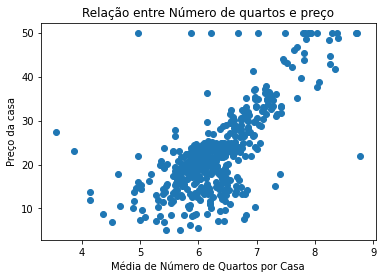

In [30]:
plt.scatter(df.RM, y)
plt.xlabel("Média de Número de Quartos por Casa")
plt.ylabel("Preço da casa")
plt.title("Relação entre Número de quartos e preço")
plt.show()

In [31]:
#Criando o objeto de regressão linear
regr = LinearRegression()

In [32]:
#Tipo do objeto
type(regr)

sklearn.linear_model._base.LinearRegression

In [33]:
#Treinando o modelo
regr.fit(x, y)

LinearRegression()

In [34]:
#Coeficientes
print("Coeficientes: ", regr.intercept_)
print("Número de Coeficientes: ", len(regr.coef_))

Coeficientes:  36.45948838509024
Número de Coeficientes:  13


In [35]:
#Prevendo o preço da casa
regr.predict(x)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

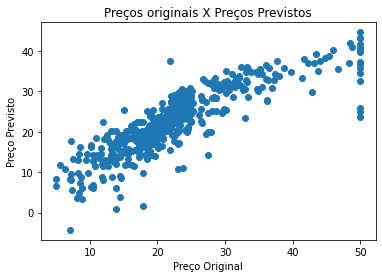

In [36]:
#Comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(x))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preços originais X Preços Previstos")
plt.show()

#### Podemos ver que existem erros na predição do preço das casas

In [38]:
#Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((df.PRICE - regr.predict(x)) ** 2)
print(mse1)

21.89483118172922


In [40]:
#Aplicando regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(x[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(x[['PTRATIO']]))**2)
print(mse2)

62.65220001376928


### O MSE aumentou, indicando que uma única característica não é um bom predictor para o preço das casas.
#### Na prática, você não vai implementar regressão linear em todo dataset. Você vai dividir o datasets de treino e de teste. Assim, você treina seu modelo nos dados de treino e depois verifica como o modelo se comporta nos seus dados de teste. Vejamos

In [43]:
#Dividindo X em dados de treino e teste
x_treino = x[:-50]
x_teste = x[-50:]

#Dividindo Y em dados de treino e teste
y_treino = df.PRICE[:-50]
y_teste = df.PRICE[-50:]

#Imprimindo o shape dos datasets
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


#### Podemos criar nossos datasets de treino de forma manual, mas claro este não é método correto. Vamos então dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split() para isso.

In [45]:
from sklearn.model_selection import train_test_split

In [54]:
#Dividindo x e y em dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, df.PRICE, test_size = 0.30, random_state = 5)

In [55]:
#Imprimindo o shape dos datasets
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(354, 13) (152, 13) (354,) (152,)


In [56]:
#Construindo um modelo de regressão
regr = LinearRegression()

In [57]:
#Treinando o modelo
regr.fit(x_treino, y_treino)

LinearRegression()

In [58]:
#Definindo os dados de treino e teste
pred_treino = regr.predict(x_treino)
pred_teste = regr.predict(x_teste)

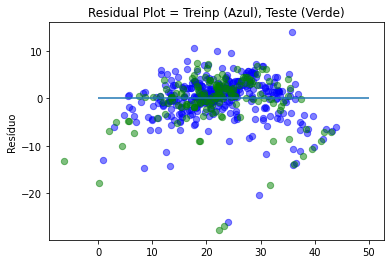

In [59]:
#Comparando preços originais x preços previstos
plt.scatter(regr.predict(x_treino), regr.predict(x_treino) - y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(x_teste), regr.predict(x_teste) - y_teste, c = 'g', s =40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot = Treinp (Azul), Teste (Verde)")
plt.show()

# Fim